In [1]:
import sys
sys.path.append('..')

In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
from Hamiltonians import Kitaev
from Utils import draw_kitaev_honeycomb
import netket as nk

In [3]:
image_path = Path('./ThesisGraphics')

In [4]:
kitaev = nk.graph.KitaevHoneycomb(extent=[2, 2], pbc=True)
graph = nk.graph.KitaevHoneycomb(extent=[3, 3], pbc=False)
hilbert = nk.hilbert.Spin(s=1/2, N=kitaev.n_nodes)
hamiltonian = Kitaev(hilbert=hilbert, graph=kitaev, J=(0.45, 0.45, 0.1))

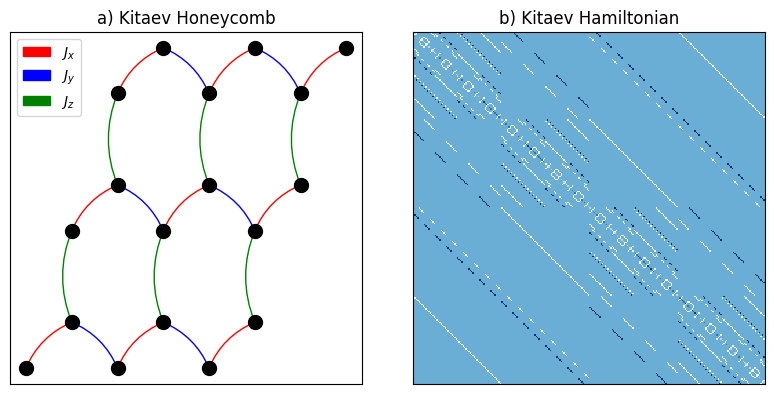

In [10]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
draw_kitaev_honeycomb(graph, ax=axes[0], node_color='black', font_size=1, node_size=100)
axes[1].imshow(hamiltonian.to_dense(), cmap='Blues', interpolation='nearest')
axes[1].set(xticks=[], yticks=[])
pos1 = axes[0].get_position()
pos2 = axes[1].get_position()
common_height = min(pos1.height, pos2.height)
common_width = min(pos1.width, pos2.width)
axes[0].set_position([pos1.x0, pos2.y0, common_width, common_height])
axes[1].set_position([pos2.x0-0.02, pos2.y0, common_width, common_height])
axes[0].set(title='a) Kitaev Honeycomb')
axes[1].set(title='b) Kitaev Hamiltonian')
figure.savefig(image_path / f'KitaevHoneycomb.png')

<Axes: >

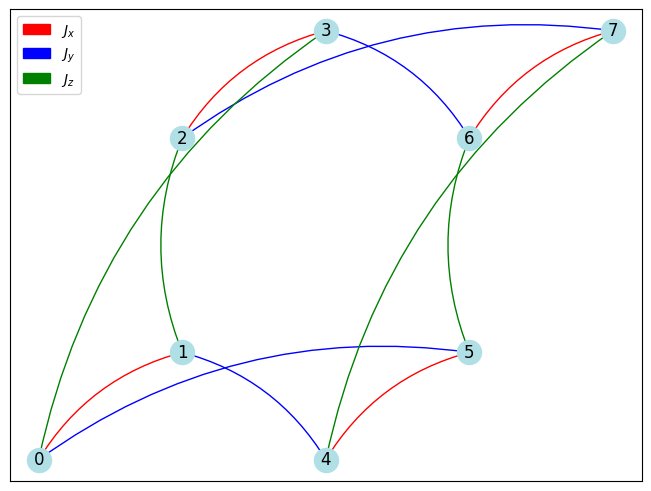

In [6]:
kitaev = nk.graph.KitaevHoneycomb(extent=[2, 2], pbc=True)
draw_kitaev_honeycomb(kitaev)